In [1]:
import numpy as np
import pandas as pd
from fcmeans import FCM
from matplotlib import pyplot as plt

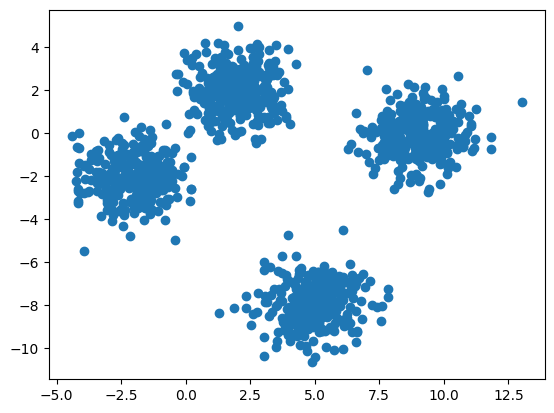

In [6]:
n_samples = 300

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2)),
    np.random.normal((9, 0), size=(n_samples, 2)),
    np.random.normal((5, -8), size=(n_samples, 2))
))

# plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [8]:
X

array([[-3.35528468, -1.14639208],
       [-1.06601834, -1.42038366],
       [-0.4250478 , -0.68029617],
       ...,
       [ 4.17913333, -8.76444326],
       [ 3.90381529, -8.91694952],
       [ 4.59175321, -9.41487036]])

In [9]:
fcm = FCM(n_clusters=2)
fcm.fit(X)

In [10]:
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

In [11]:
fcm_centers

array([[ 0.29170101, -0.234968  ],
       [ 6.80847497, -4.05091259]])

In [14]:
fcm_labels

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
np.unique(fcm_labels)


array([0, 1])

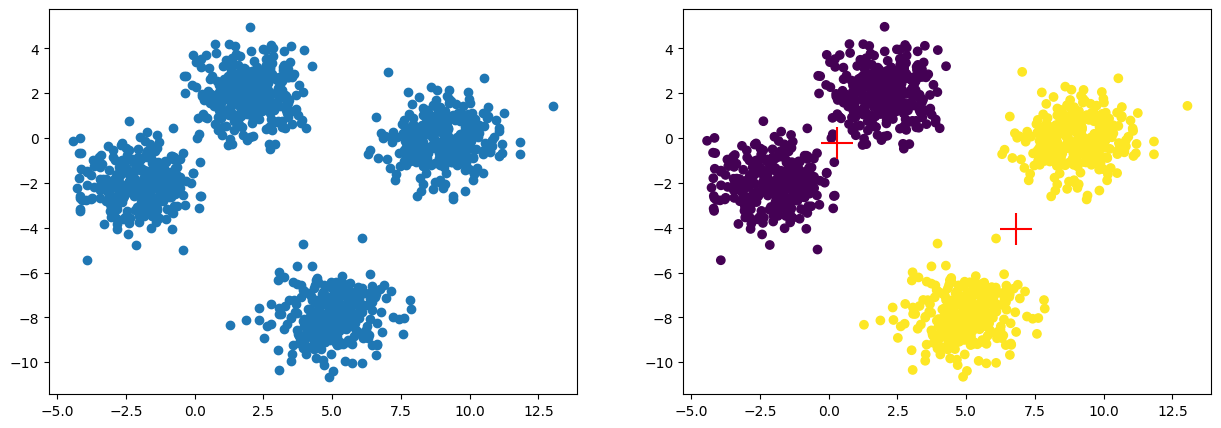

In [18]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].scatter(X[:,0], X[:,1])
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='red')
plt.show()

In [20]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(X)
    models.append(fcm)

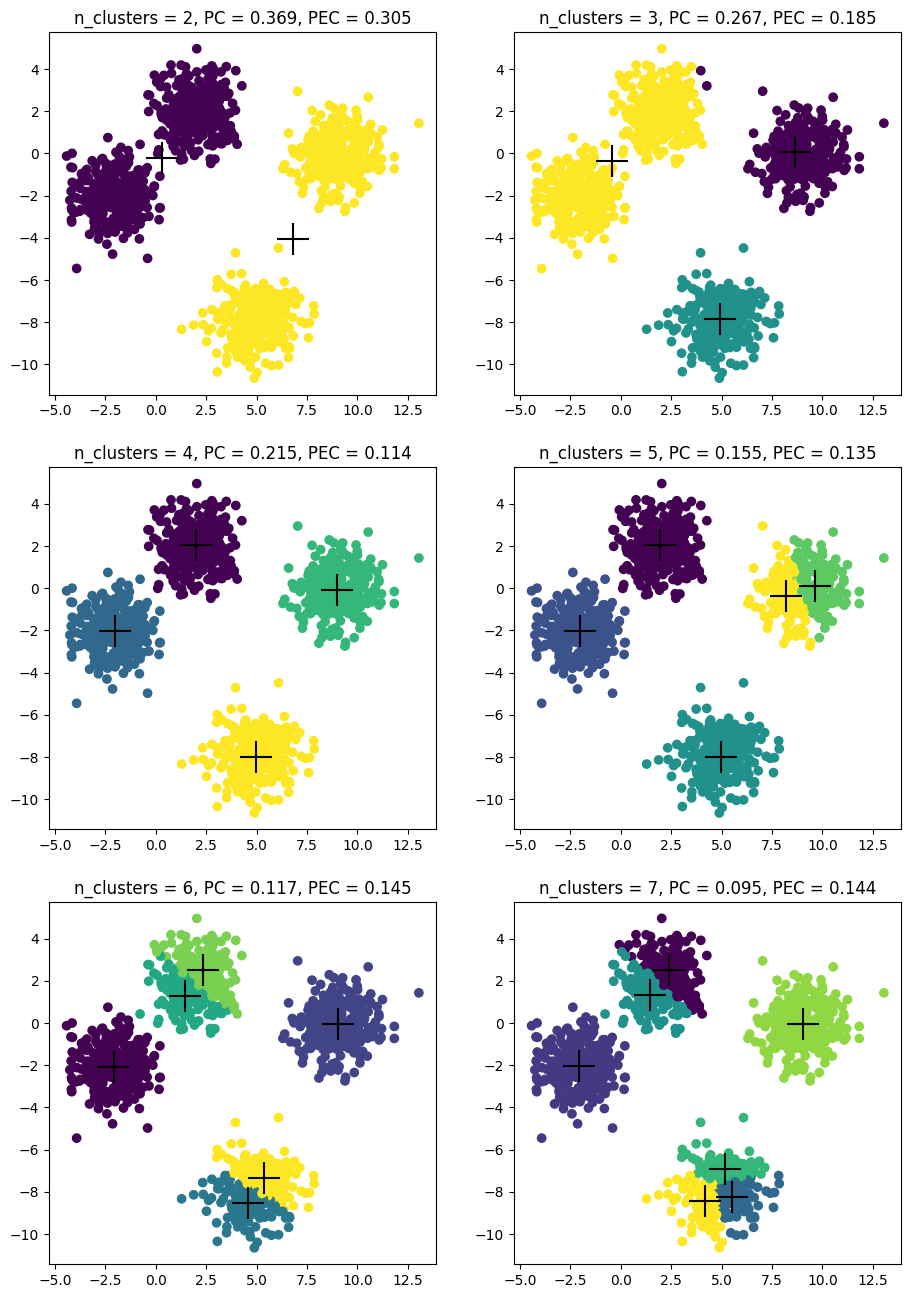

In [23]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(X)
    # plot result
    axe.scatter(X[:,0], X[:,1], c=fcm_labels)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()